<a href="https://colab.research.google.com/github/gotto142/GitExercise_Conflicts/blob/main/08-Datavis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Class Announcements

### CHECK CANVAS FOR GROUP ASSIGNMENTS!!
If you are put in the wrong group you need to email me ASAP with the subject line: COGS108 Group Assignment Problem.  Clearly explain which group you were supposed to be in (either by group number or by giving me the full names of at least two people in the group)

**Due Monday**:
- Q3

**Due ~Wednesday~Friday**:
- Project review (Google form, 1 per group only!)



# Data Visualization

- tools:
    - `seaborn` - generating plots
    - `pandas` - wrangling data
    - `matplotlib` - fine-tuning plots
- plotting
    - quantitative data
    - categorical data
- customizing visualizations

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS108/Lectures-Wi26/blob/main/08-Datavis.ipynb)




<div class="alert alert-success">
For more information on this topic, check out: (1) Jake VanderPlas' <a href="https://github.com/jakevdp/PythonDataScienceHandbook" class="alert-link">Python Data Science Handbook</a> and (2) Berkeley's <a href="https://www.textbook.ds100.org/ch/06/viz_intro.html" class="alert-link">Data 100 Textbook</a>.
</div>

A good data visualization can help you:
- identify anomalies in your data
- better understand your own data
- communicate your findings


## Quick Introduction
95%+ of plots fall into just a few types:
- single variable
    - continuous
    - discrete
- discrete vs discrete
- discrete vs continuous
- continuous vs continuous

## Basic Visualizations

- histograms
- densityplots
- scatterplot
- barplot
    - grouped barplot
    - stacked barplot
- boxplot (and related things like violinplots, etc)
- line plot

## Variable types : Plots
- statistical/distribution of quantitative variable
    - single variable
        - histogram
        - densityplot
    - single variable x categorical variable
        - boxplot
- count data
    - count data x categorical variable
        - barplot
    - count data x 2 categorical variables
        - grouped bar plot
        - stacked bar plot
- Directly view quantitative variables
    - one variable x time
        - line plot
    - one variable x time x categorical variable
        - multiple lines on the same plot
    - two (or maybe 3) quantitative variables
        - scatter plot
        

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/histogram.png)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/densityplot.png)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/scatterplot.png)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/barplot.png)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/grouped_barplot.png)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/stacked_barplot.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/boxplot.png)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/line_plot.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

https://forms.gle/Dn1k7uHoQSwoVoHS7

<!-- <img src="https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/qr-code.png" width="900"/> -->



#### Question #1  

You want to visualize how many people in your dataset prefer chocolate chip cookies and how many prefer oatmeal raisin cookies.

**What type of visualization would be most appropriate?**

- A) histogram
- B) scatterplot
- C) barplot
- D) boxplot
- E) line plot


#### Question #2

You're interested in visualizing how many servings of milk an individual drinks each day among those who prefer chocolate chip cookies and those who prefer oatmeal raisin cookies.

**What type of visualization would be most appropriate?**

- A) histogram
- B) scatterplot
- C) barplot
- D) boxplot
- E) line plot

#### Question #3

You're interested in visualizing how many servings of milk an individual drinks each year over the course of their life.

**What type of visualization would be most appropriate?**

- A) histogram
- B) scatterplot
- C) barplot
- D) boxplot
- E) line plot

# Plotting in Python: Getting Started

First we'll import the libraries we'll use for plotting.

In [1]:
# import working with data libraries
import pandas as pd
import numpy as np

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [2]:
sns.__version__

'0.13.2'

# `seaborn`

`seaborn` is a great place to get started when generating plots that don't look awful.

# Class Data
With the libraries we need imported, the first dataset we'll use today is data from the COGS 108 class survey from the Spring of 2019.

In [3]:
df = pd.read_csv('https://github.com/COGS108/Lectures-Wi26/raw/main/data/processed_precourse_survey_wi26.csv')
df = df.set_index('Unnamed: 0')

df.shape

(710, 12)

In [4]:
# there are some low N student groups, lets drop them from analysis

values_to_drop = ['Postgraduate', 'Nonbinary', 'Decline to answer']

# 3. Create a boolean mask and use negation (~) to keep rows *not* in the set
df = df[~df['gender'].isin(values_to_drop)]
df = df[~df['class_level'].isin(values_to_drop)]

df.shape

(695, 12)

In [5]:
df.head()

,languages,statistics_level,programming_level,major,class_level,gender,Hispanic,race,LGBTQIA,international_student,transfer_student,first_generation_student
Unnamed: 0,,,,,,,,,,,,
0,"Python, Java, R",5,8,Cognitive Science,Junior,Female,No,Asian,No,Yes,No,No
1,"Java, None of these (I'm not comfortable progr...",3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None of these (I'm comfortable in another lang...,5,5,Electrical and Computer Engineering,Senior,Male,No,Asian,No,No,Yes,No
3,"Python, Java, MATLAB",7,8,Mathematics,Junior,Male,No,White,No,No,No,No
4,"Python, MATLAB",5,10,Physics,Senior,Male,Yes,White,No,No,No,Yes


In [6]:
df.describe()

,statistics_level,programming_level
count,695.000000,695.000000
mean,5.894964,6.264748
std,1.927105,2.281136
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,7.000000,8.000000
max,10.000000,10.000000


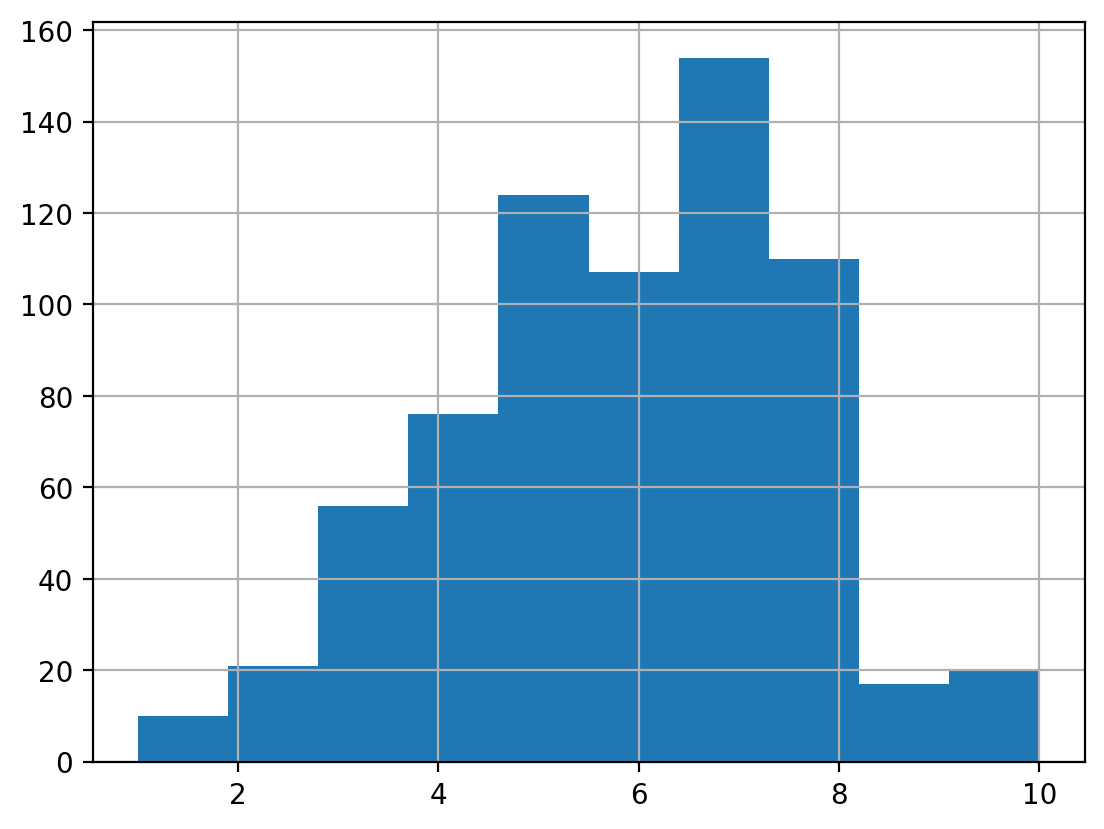

In [7]:
df['statistics_level'].hist();

# Quantitative Variables

- histograms
- densityplots
- scatterplots


## Histograms and Densityplots

__Histograms__ & __Densityplots__ are helpful for visualizing information about a _single quantitative variable_.

We can use seaborn's `histplot` function. (`distplot` in older versions of `seaborn`)

In [8]:
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10,10) # plot size to output

In [9]:
sns.set_theme(context='notebook', # also try “paper”, “talk”, and “poster”
              style='darkgrid', # also try 'dark', 'white', and 'whitegrid'
              font_scale=2)

One thing to note about histograms is the fact that the number of  bins displayed plays a large role what the viewer takes away from the visualization.

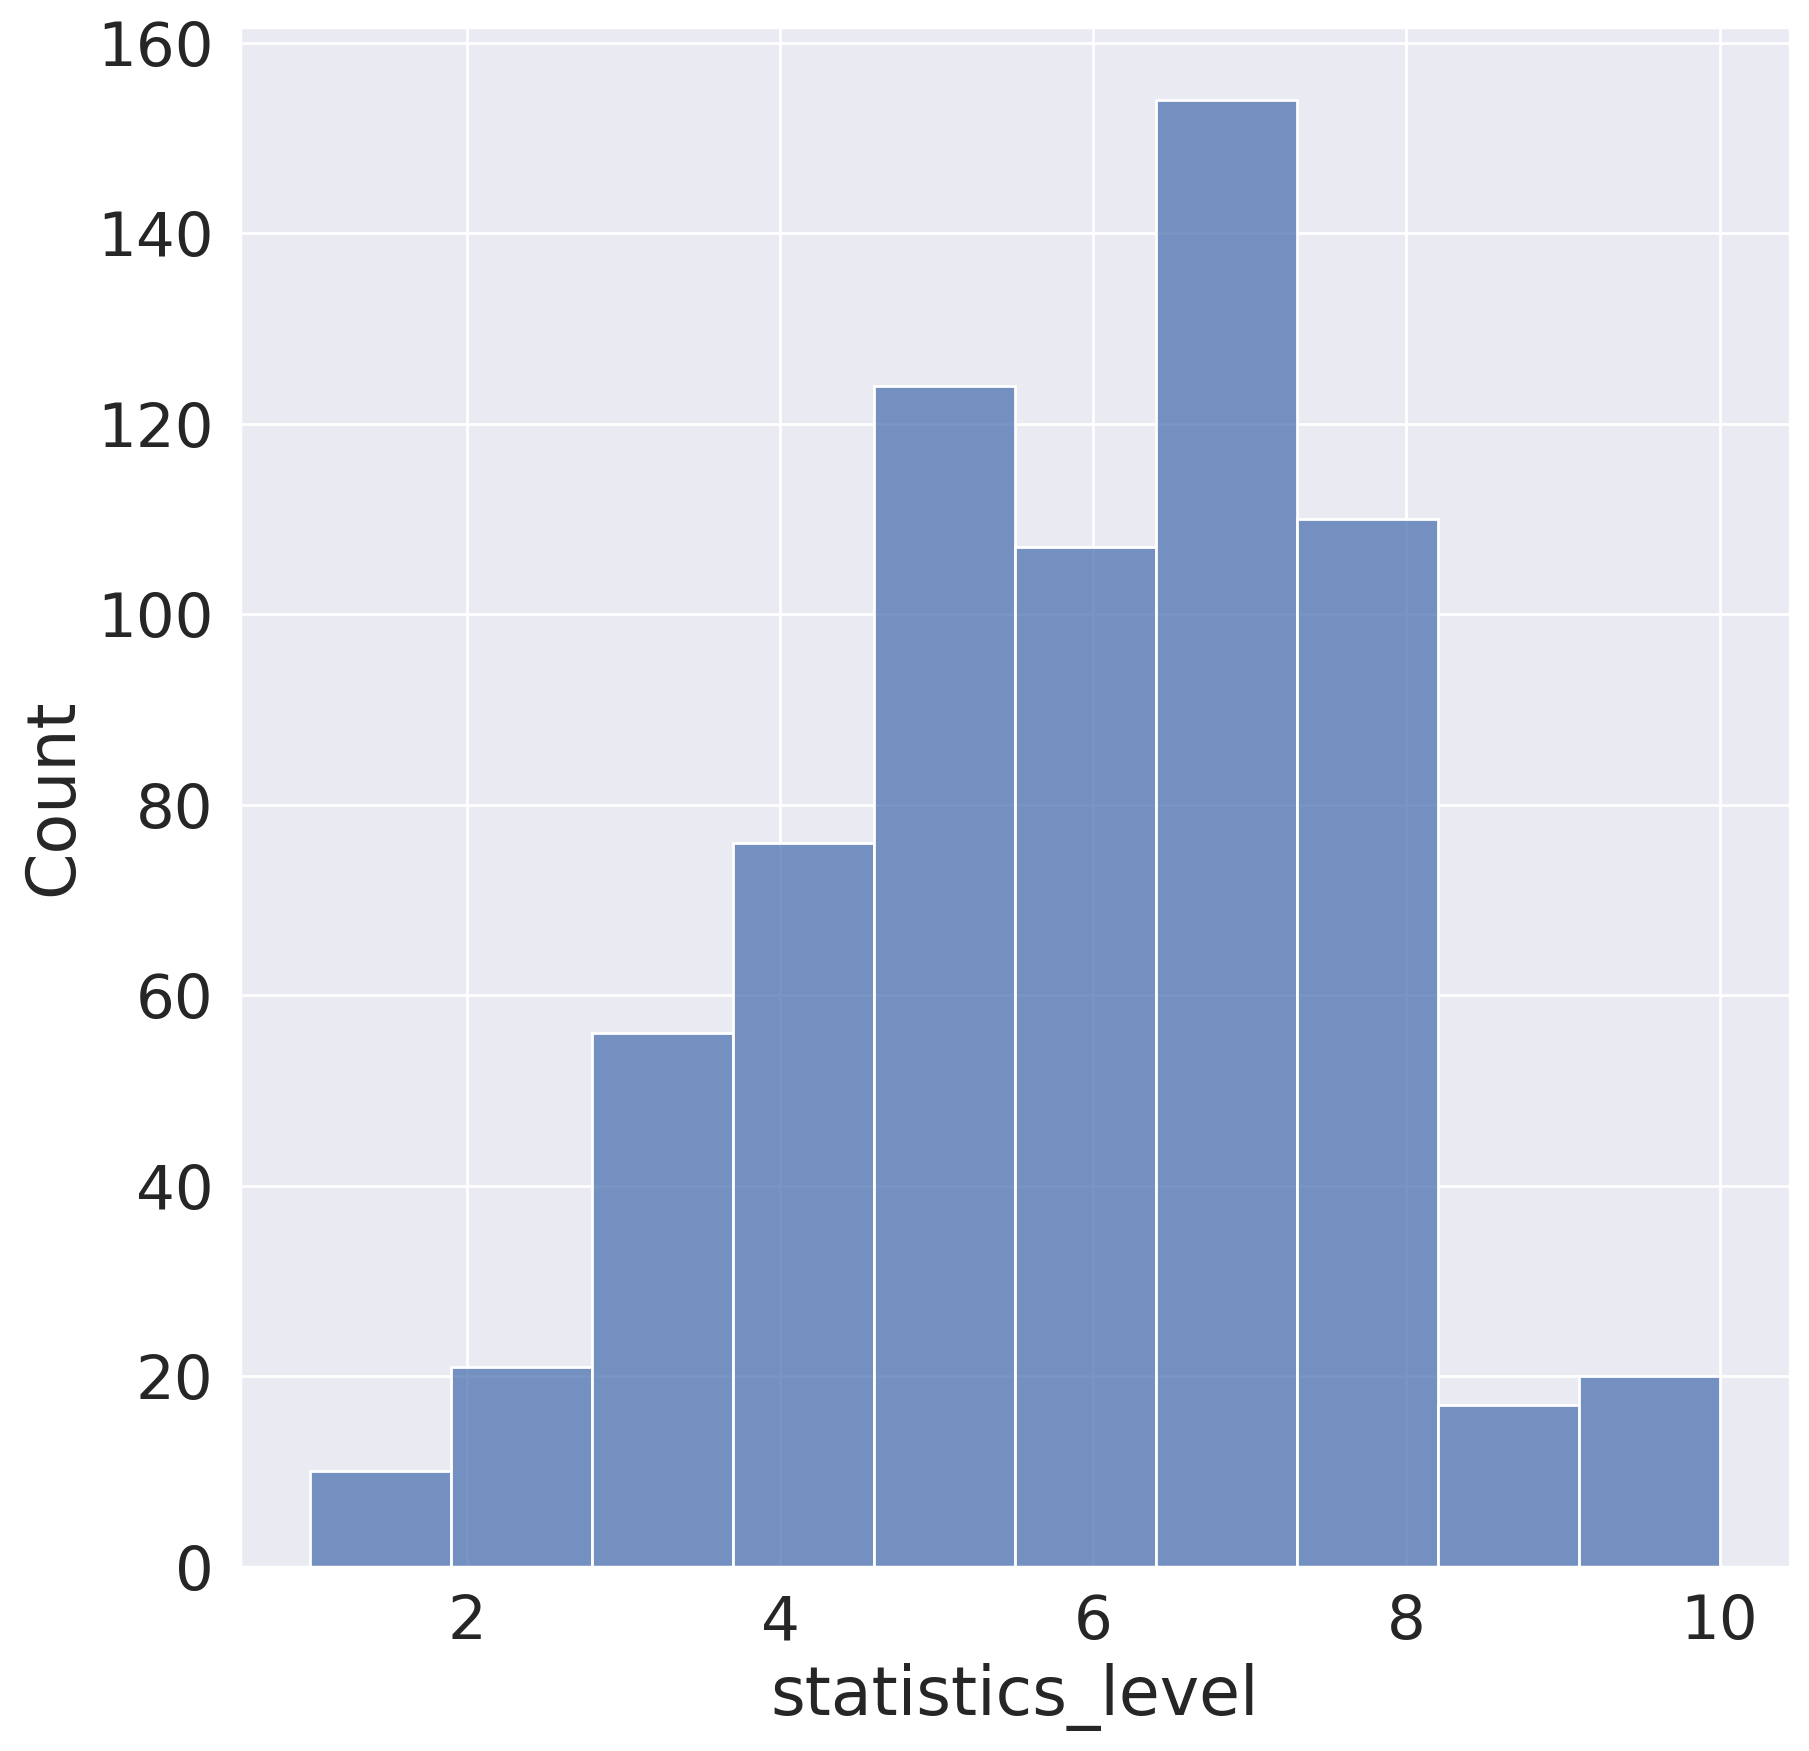

In [10]:
# histogram
#`distplot` in older versions of `seaborn`
# optional arguments:
#    bins (defaults to auto bin selection),
#    kde (defaults False)
sns.histplot(df['statistics_level'], bins=10, kde=False);

This doesn't follow "visualization best practices."

#### Question #4

Consider what are some positive and some negative aspects of the visualization above.

I'll ask for people to share in class what they are thinking after you have some time to think

## Visualization Best Practices

- Choose the right type of visualization
- Be mindful when choosing colors
- Label your axes
- Make text big enough
- Keep it simple
- Less is more:
    - Aim to improve your data:ink ratio
    - Everything on the page should serve a purpose. If it doesn't, remove it.
    

### Best Practices: Example

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/original.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

Ideas:

- Pros:
    - consistent colors from left to right
    - values provided for each slice
    - overall picture
- Cons:
    - text size
    - legend not ideal
    - colors are not intuitive
    - pie chart not ideal b/c of # of categories

Suggestions:
- different visualiztion - stacked barplot?



![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/improvement1.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/improvement2.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)

![](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/improvement3.png)

Source: [Storytelling with Data (Nussbaumer Knaflic)](http://www.storytellingwithdata.com/books)


### Less is more

The *less is more* approach suggests that we should probably get rid of this background color now and remove the gridlines. We'll use the _less is more_ approach as we work through the other types of visualizations.

Let's improve that now for our original plot...

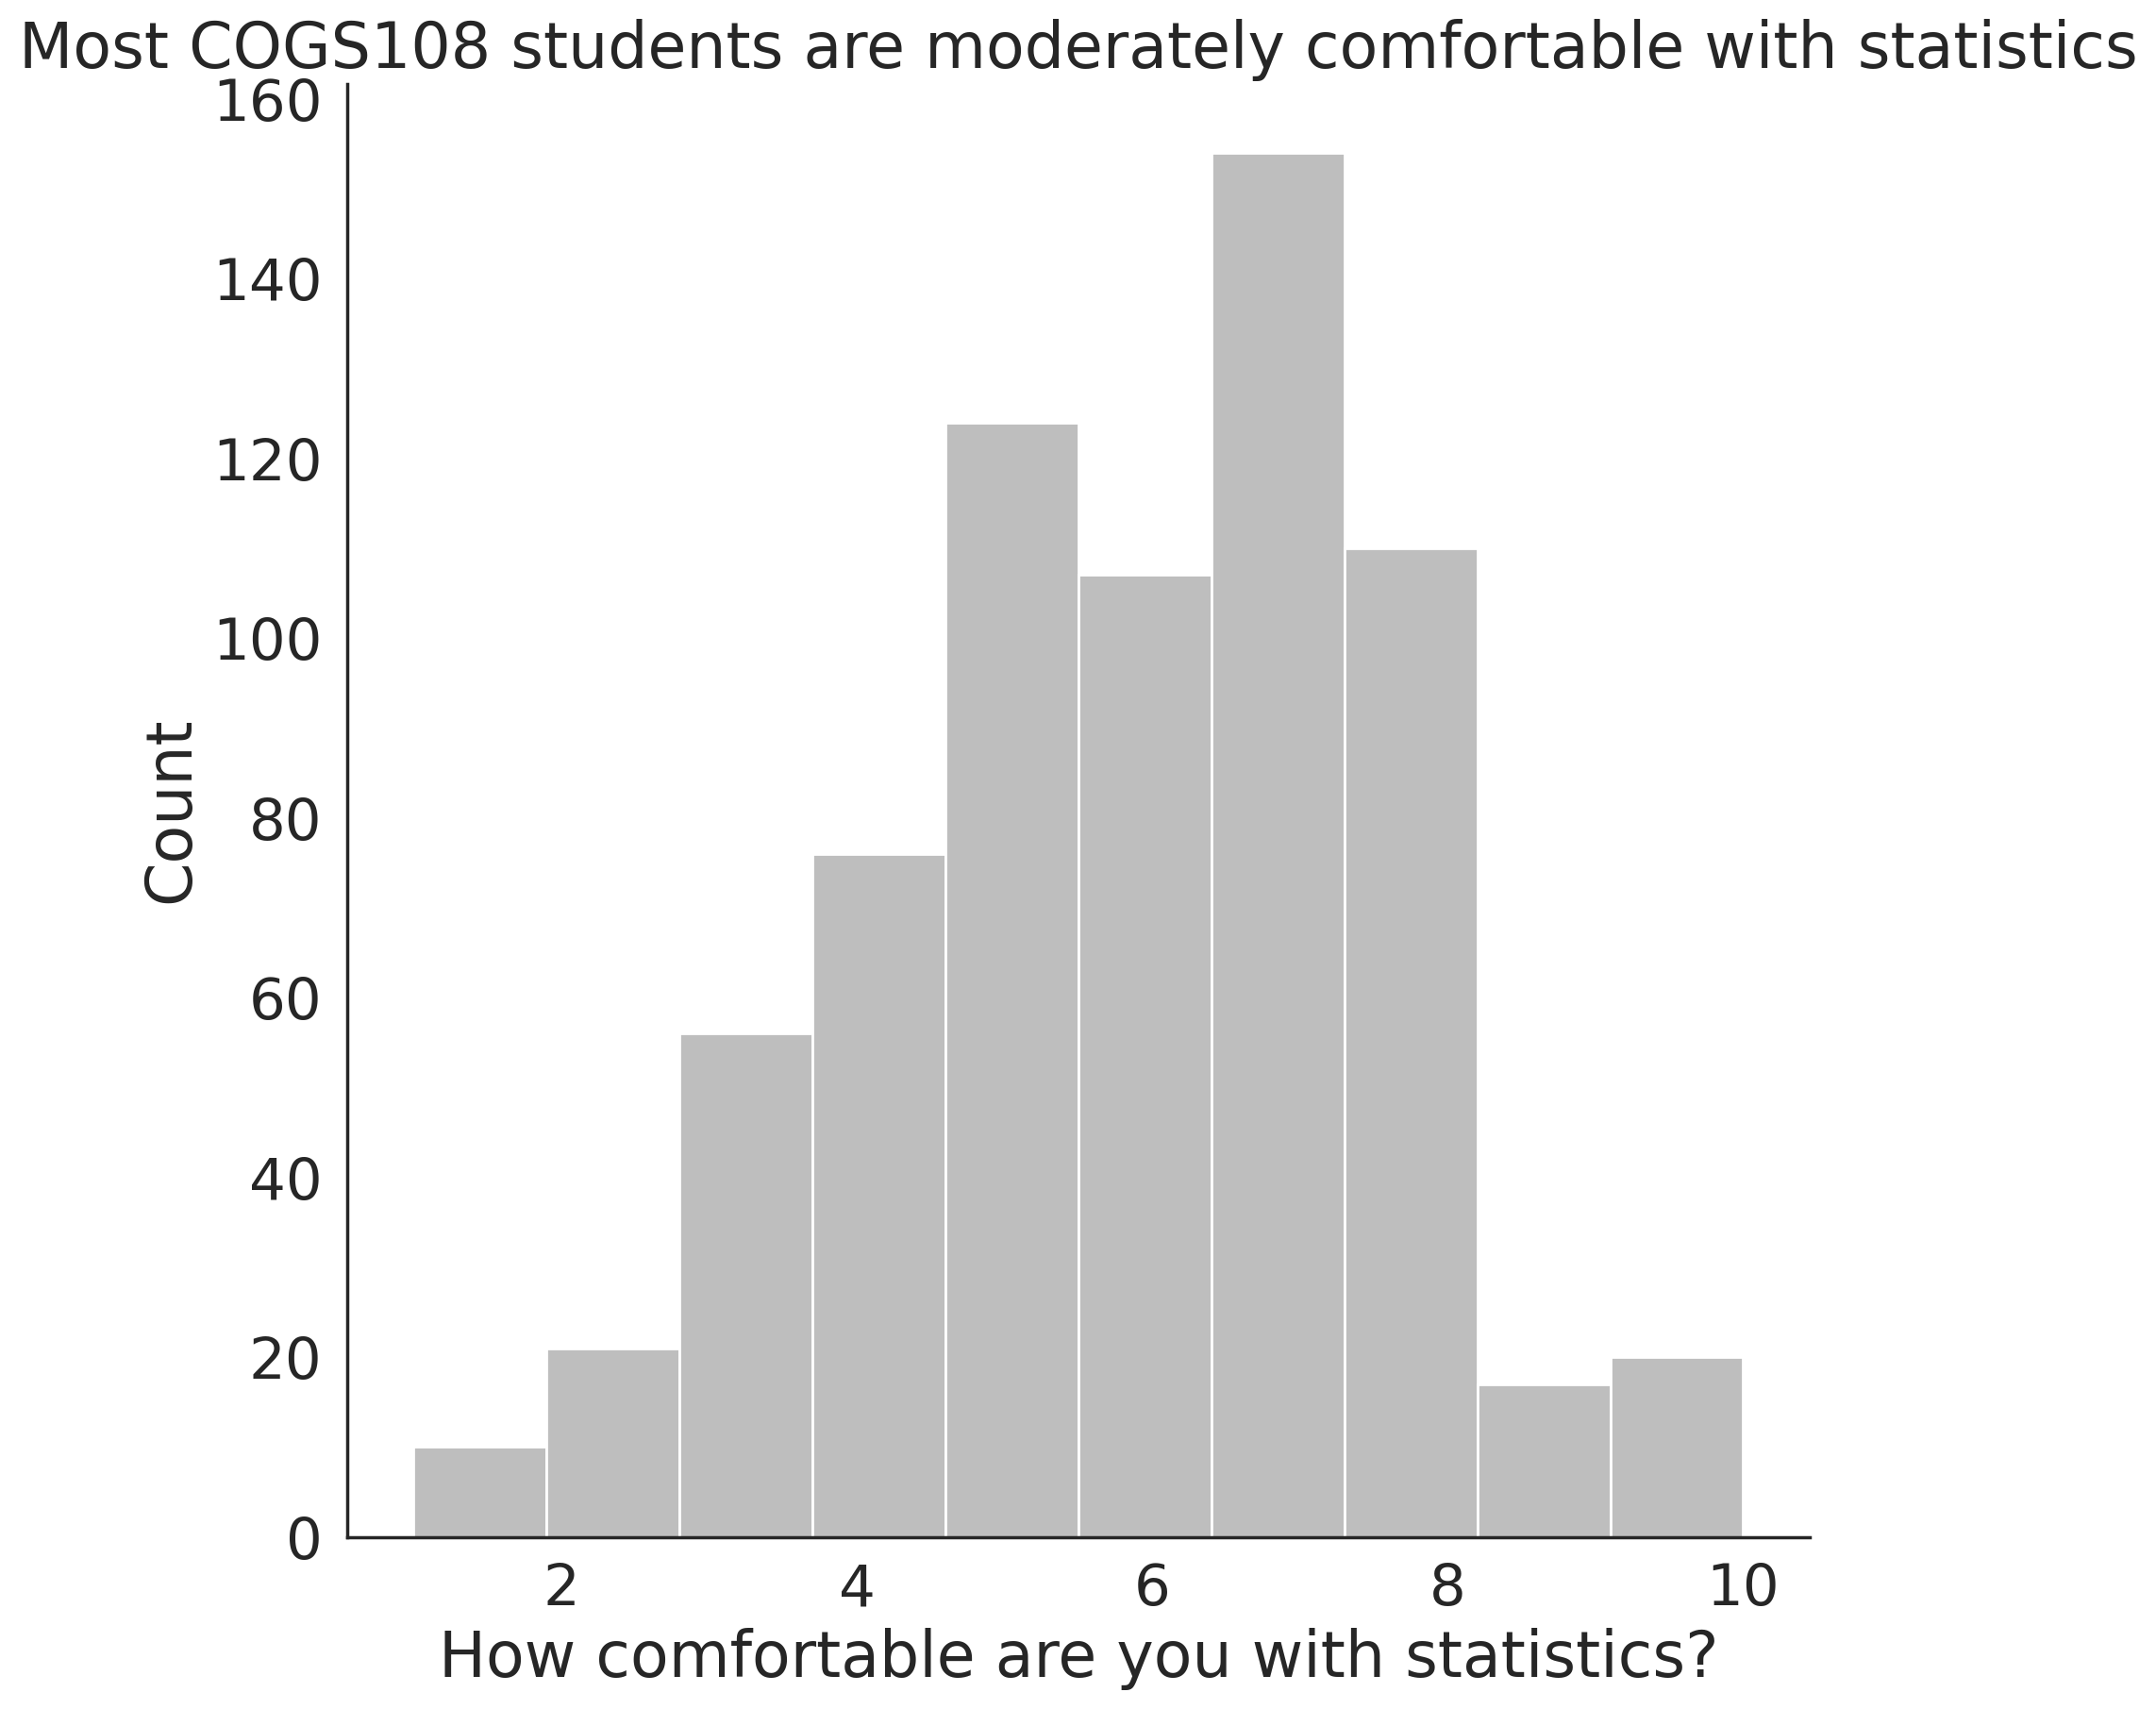

In [11]:

# change background to white without grid
# make bar color dark grey
sns.set_theme(style='white', font_scale=2)

ax = sns.histplot(df['statistics_level'],
                  bins=10, color='darkgrey', kde=False)
# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are moderately comfortable with statistics')
ax.set_ylabel('Count')
ax.set_xlabel('How comfortable are you with statistics?');

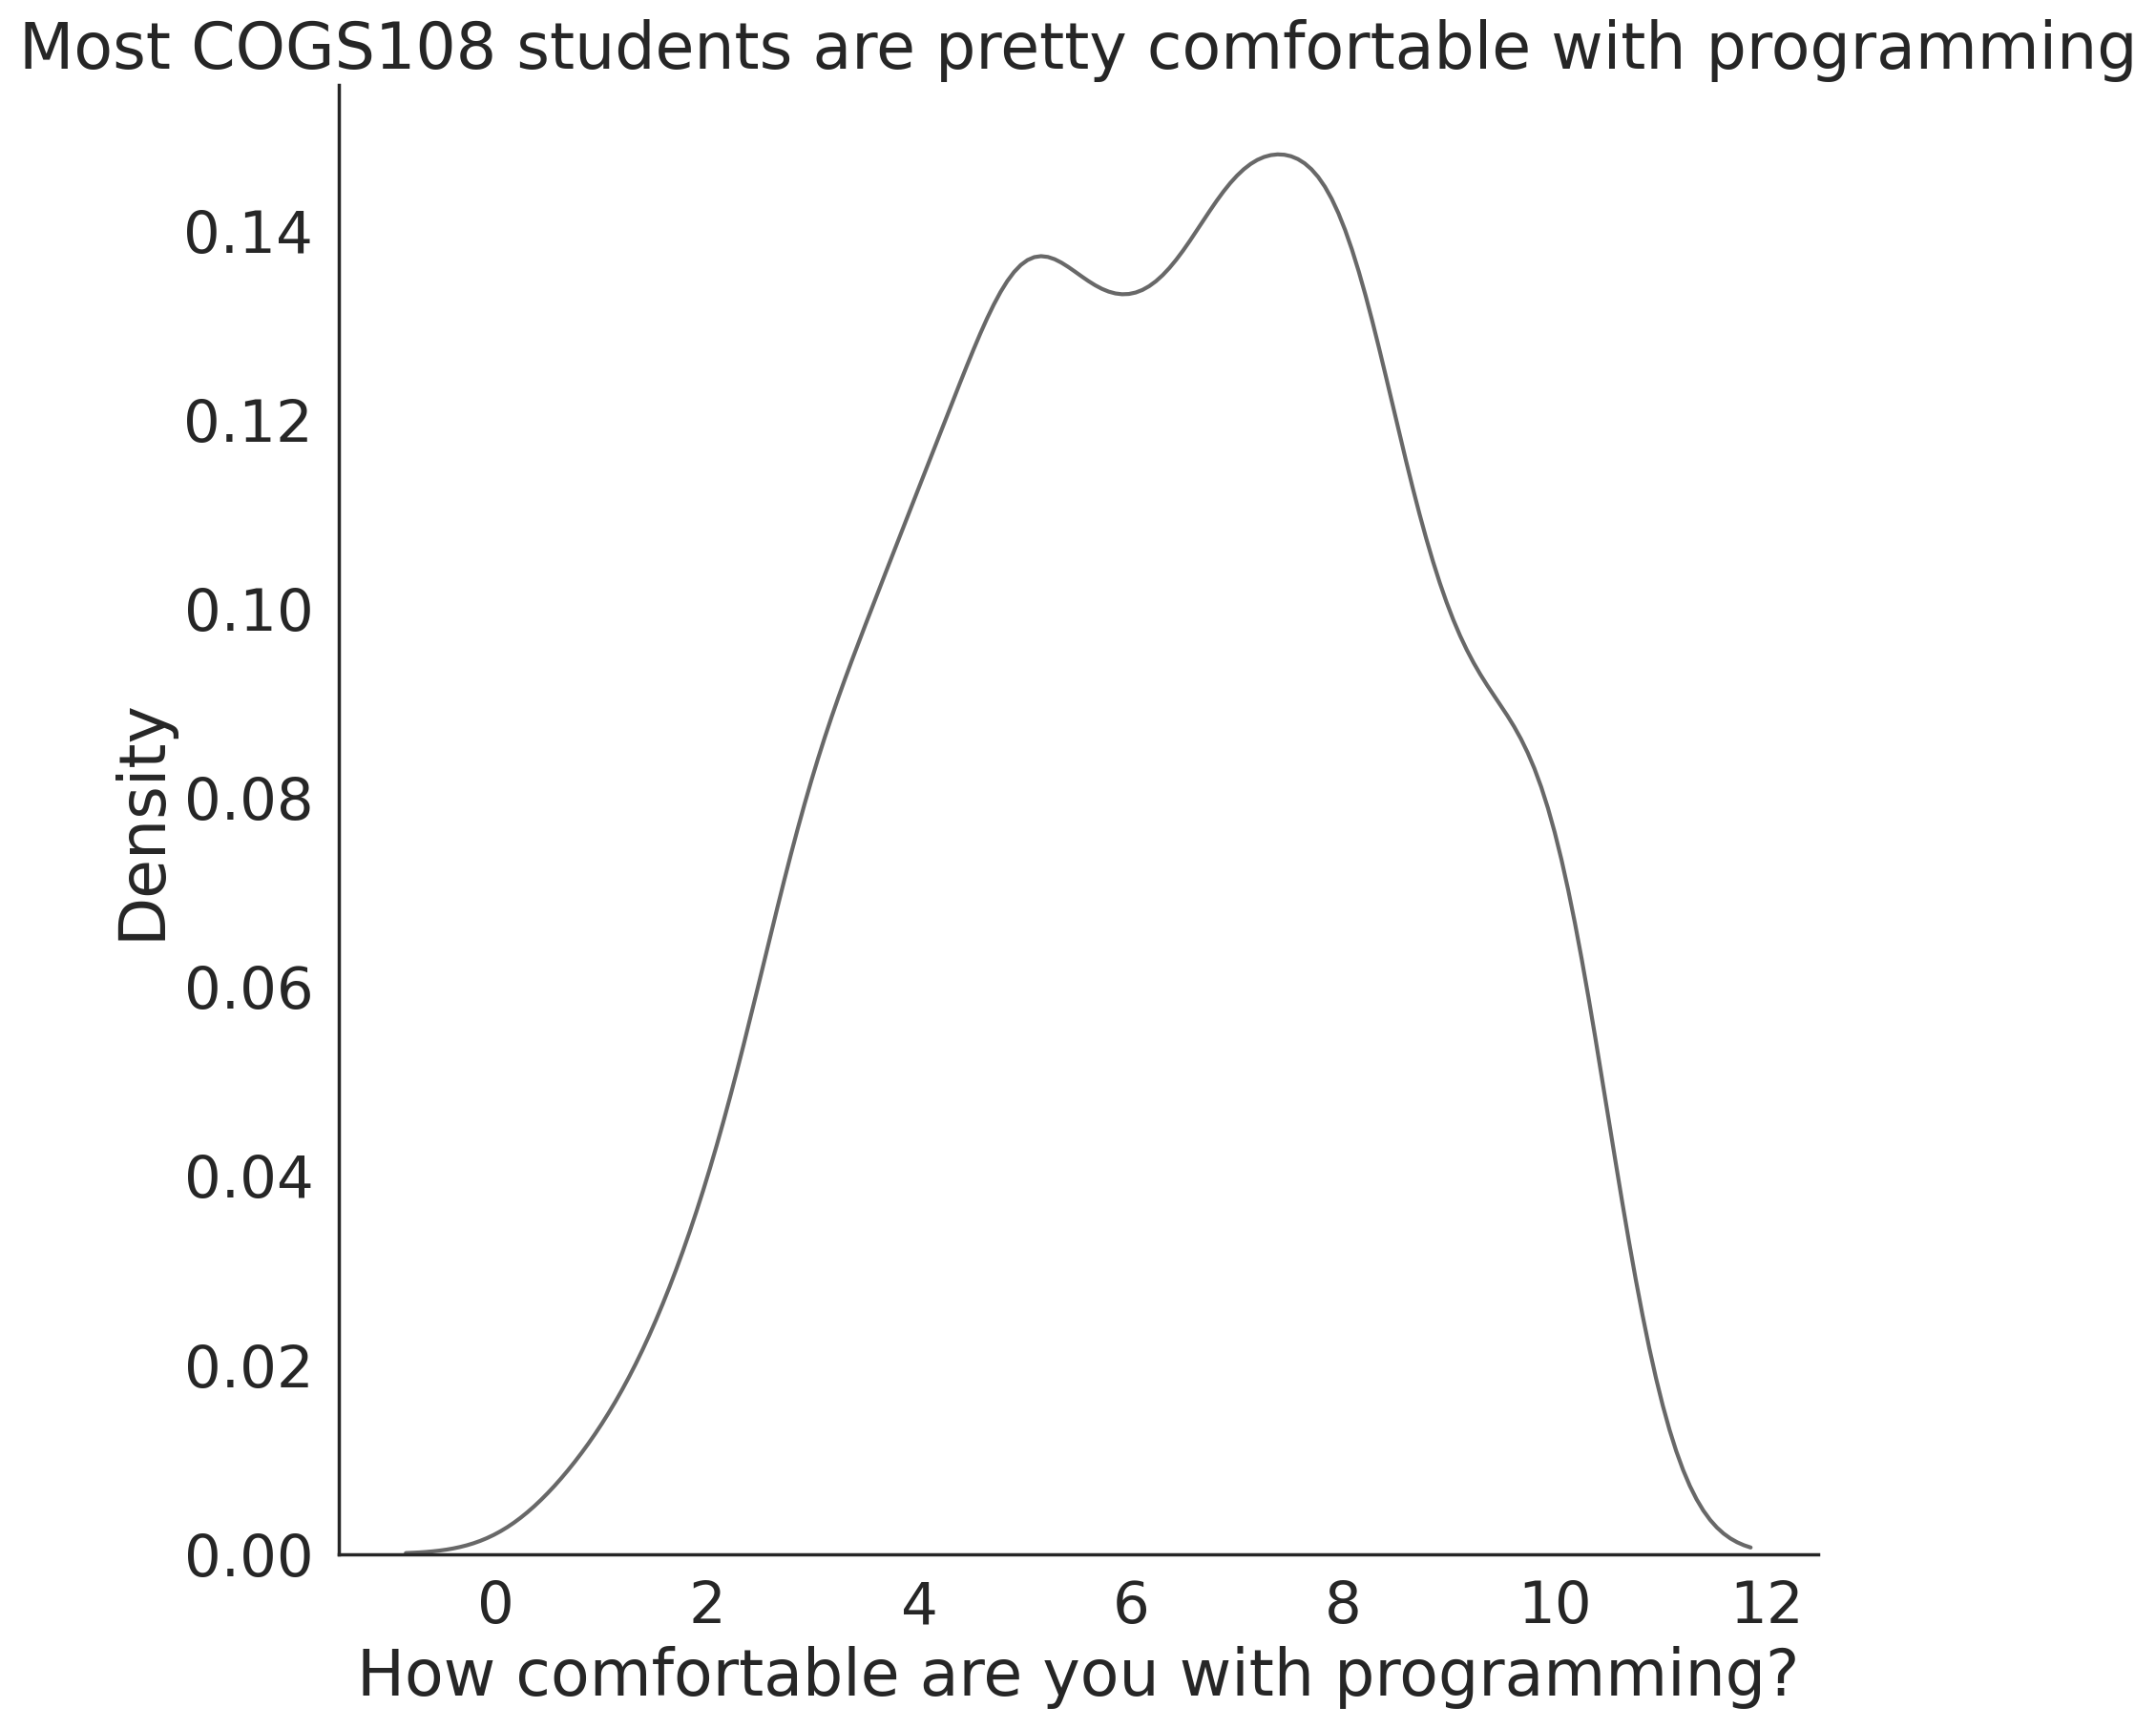

In [12]:
# kdeplot to only display the densityplot
ax = sns.kdeplot(df['programming_level'], color='#686868')

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are pretty comfortable with programming')
ax.set_ylabel('Density')
ax.set_xlabel('How comfortable are you with programming?');

## Scatterplots

Scatterplots can help visualize the relationship between __two quantitative variables__.

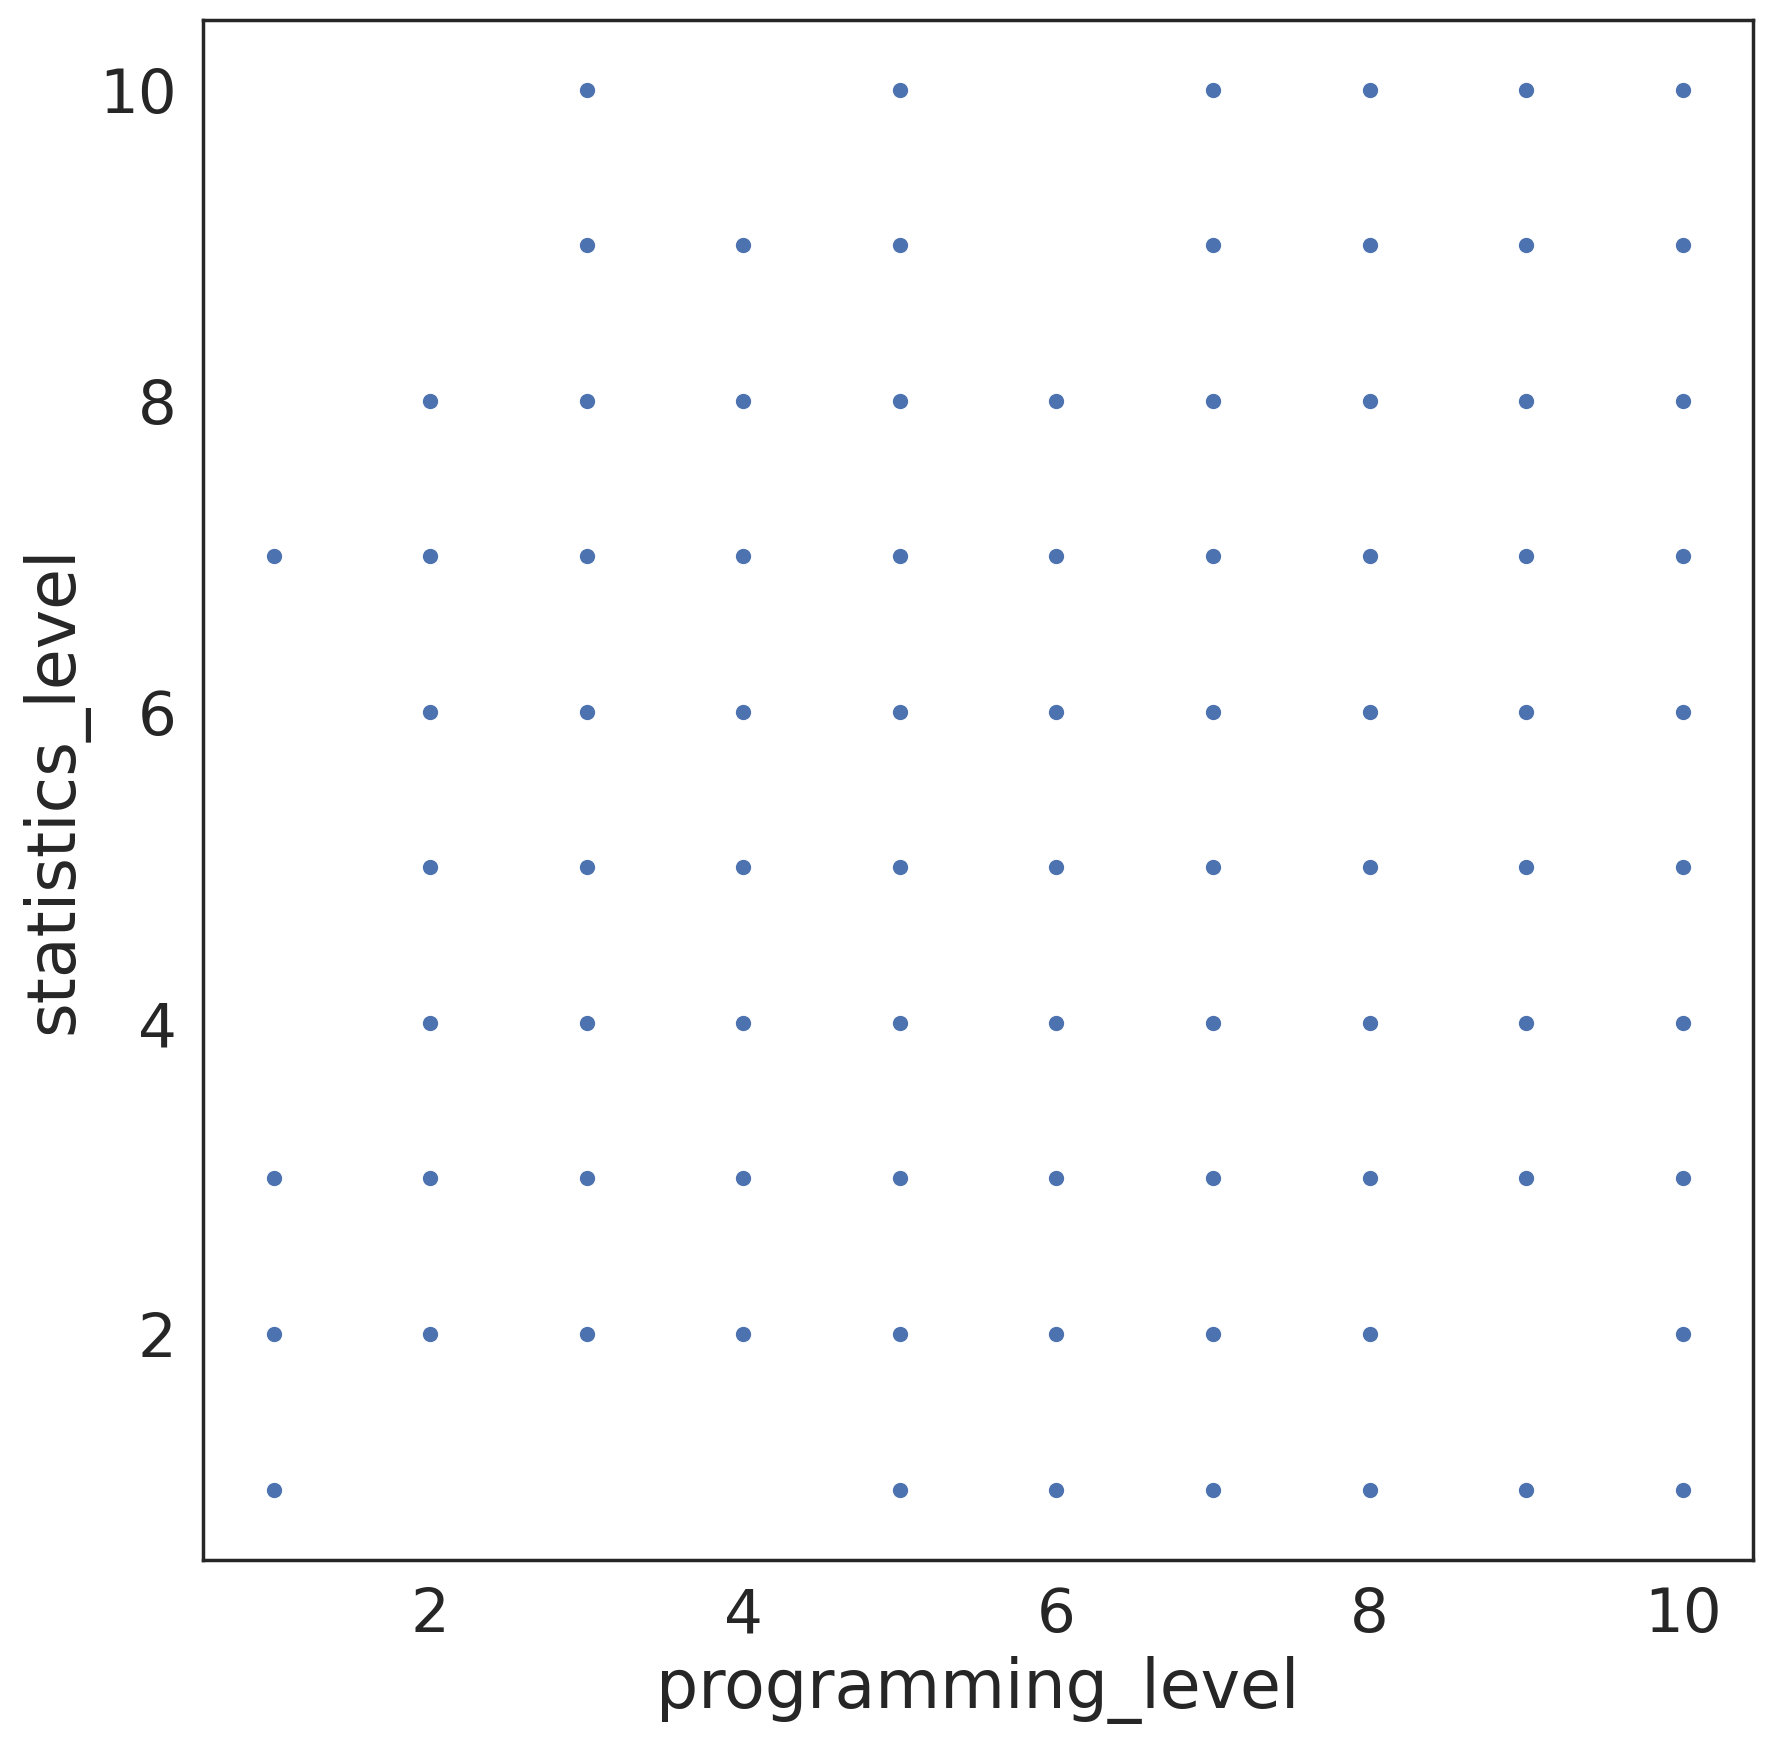

In [13]:
sns.scatterplot(x='programming_level', y='statistics_level', data=df,
                # alpha=0.1 # comment this in and out
               );

# alternative with pandas
# df.plot.scatter('programming', 'statistics');

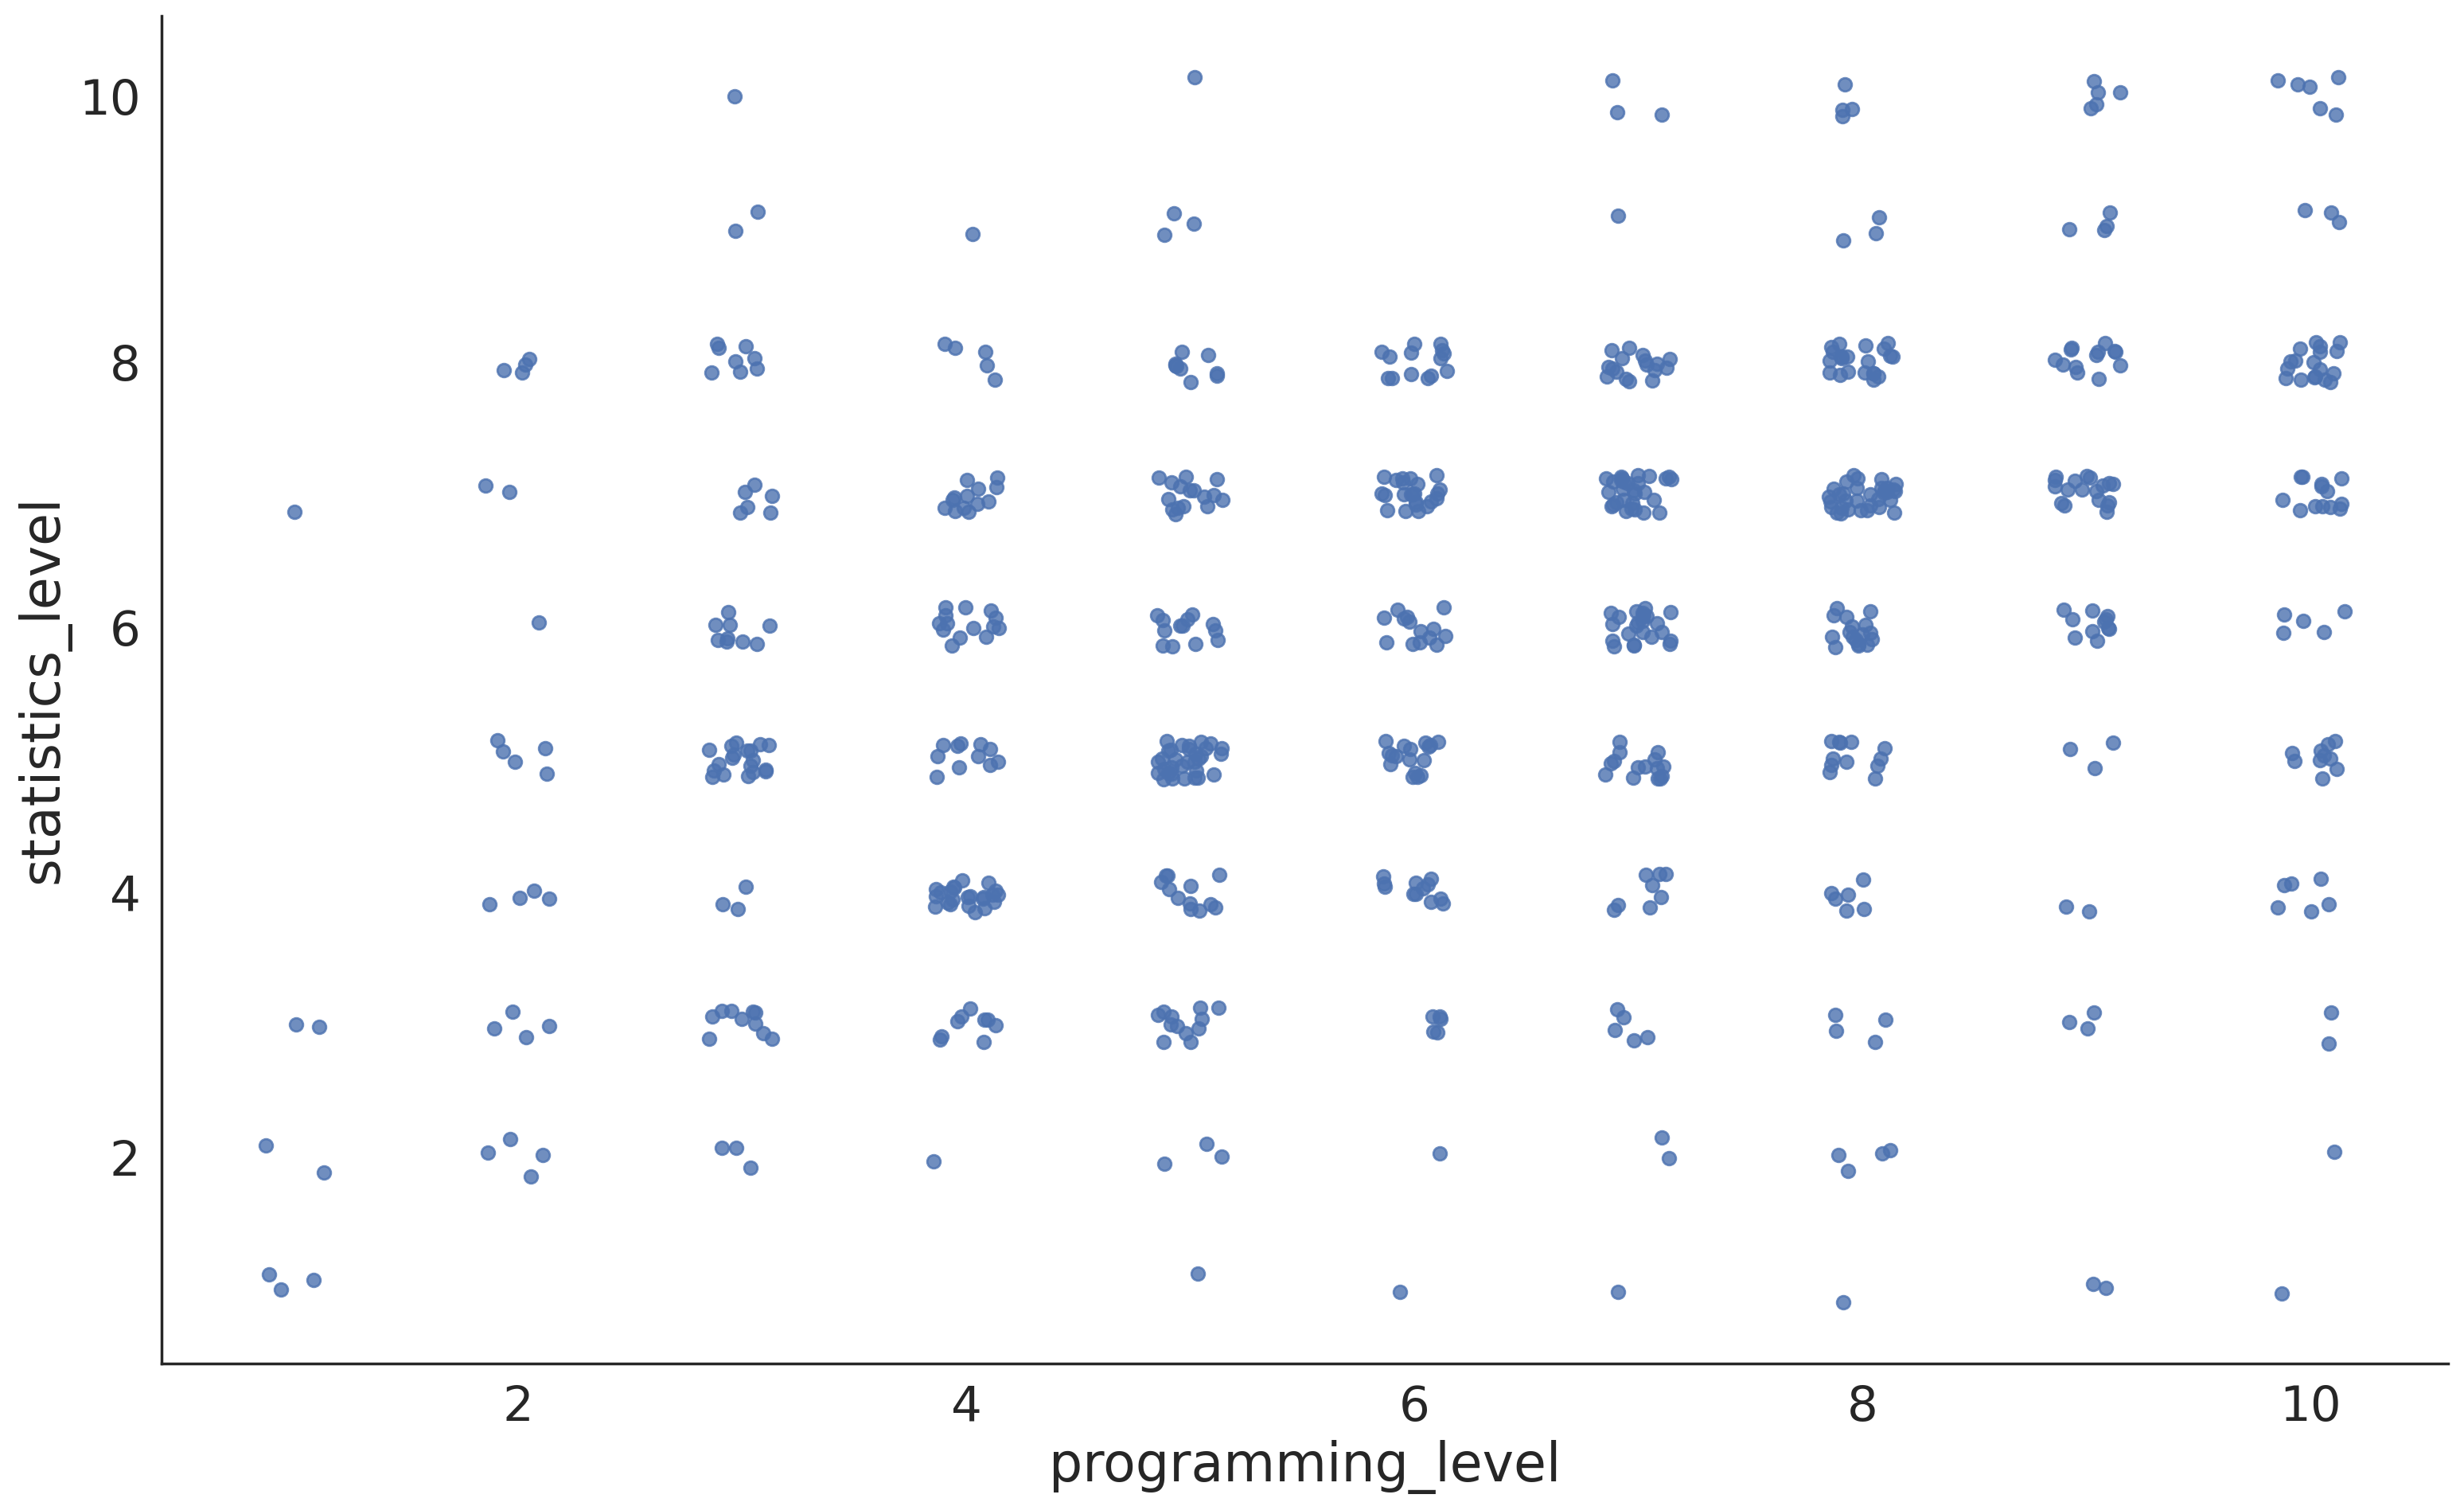

In [14]:
# jitter points to see relationship, try different levels of it
sns.lmplot(x='programming_level', y='statistics_level', data=df,
           fit_reg=False, height=10, aspect=1.6,
          x_jitter=.15, y_jitter=.15);

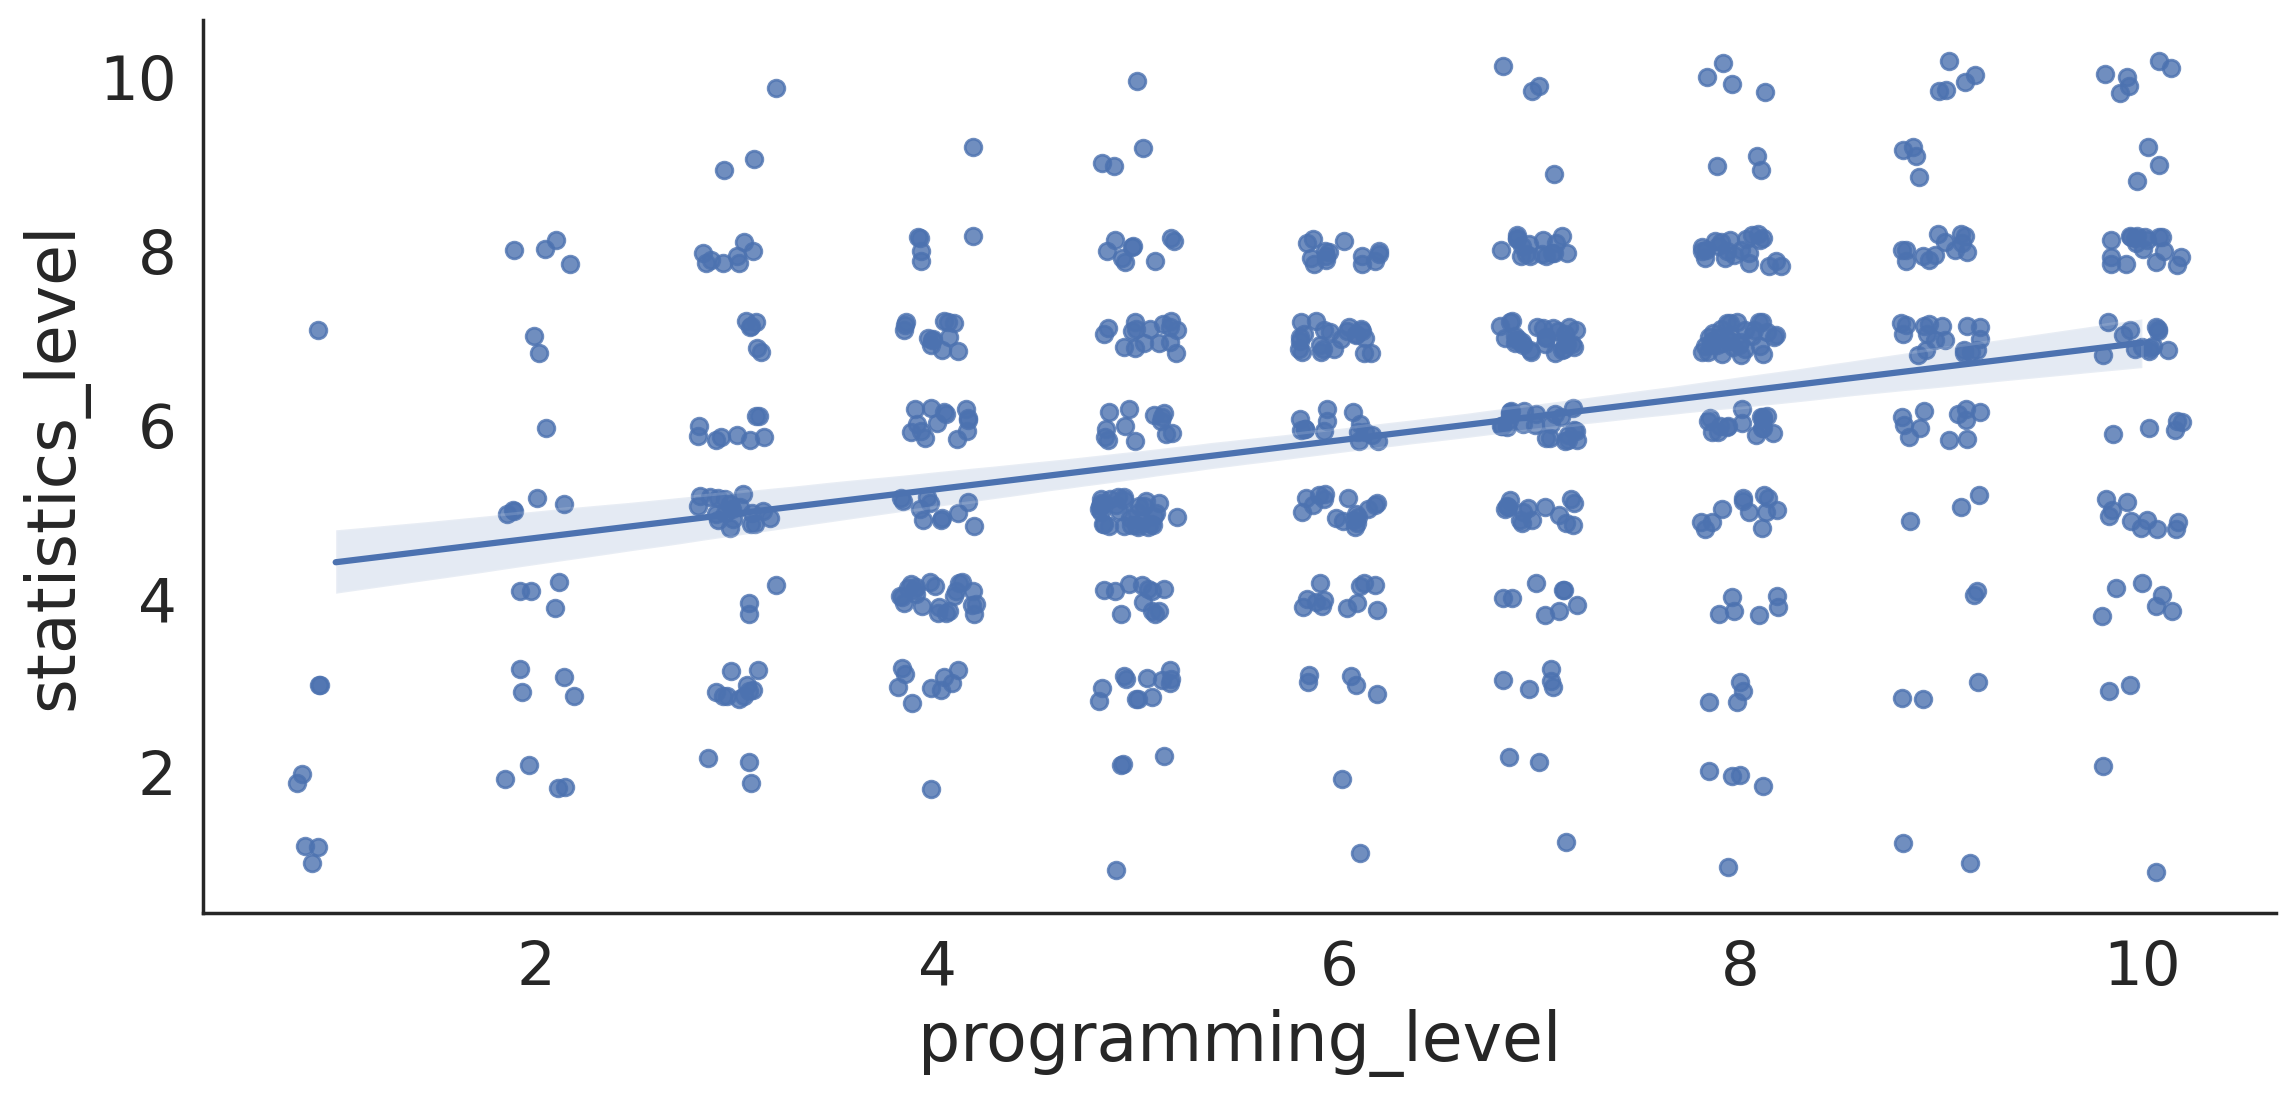

In [15]:
# fit a linear model, showing the line of best fit
# and also 95% confidence interval on the fit
sns.lmplot(x='programming_level', y='statistics_level', data=df,
           fit_reg=True, height=6, aspect=2,
          x_jitter=.20, y_jitter=.20);

#### Question #5

What can we say about the relationship between students' comfortability with programming and statistics?

- A) Students who are more comfortable programming are more comfortable with statistics
- B) Students sho are more comfortable programming are less comfortable with statistics
- C) There is little relationship between students' comfort level with programming and statistics

## Scatterplots (by a categorical variable)

When you want to plot two numeric variables but want to get some insight about a *third* categorical variable, you can color the points on the plot by the categorical variable.

### COLOR !
By the way you REALLY need to read this... over and over over again: https://seaborn.pydata.org/tutorial/color_palettes.html


In [ ]:
# control color palette
unique = pd.concat([df["class_level"], df["gender"]]).unique()
my_palette = dict(zip(unique, sns.color_palette()))
my_palette.update({"Total":"k"})
print(my_palette)

In [ ]:

# color points by gender is
sns.lmplot(x='programming_level', y='statistics_level', data=df, hue='gender',
           fit_reg=True, height=6, aspect=2,
           x_jitter=.5, y_jitter=.5,
           palette=my_palette);

In [ ]:

sns.lmplot(x='programming_level', y='statistics_level', data=df, hue='class_level',
           fit_reg=True, height=6, aspect=2,
           x_jitter=.5, y_jitter=.5,
           palette=my_palette);

#### Question #6

What can we say about the relationship between students' comfortability with programming and statistics and gender? And, how easy is this to determine?

- A) Females and Other/Prefer not to say tend to be more comfortable with programming; easy to determine
- B) Females and Other/Prefer not to say tend to be more comfortable with programming; difficult to determine
- C) Males tend to be more comfortable with programming; easy to determine
- D) Males tend to be more comfortable with programming; difficult to determine
- E) I'm super lost.

We don't get a _ton_ more information here, but what we may see a slight shift in programming comfortability to include more males relative to females. To better understand this, a boxplot would be helpful. (We'll look at this shortly.)

# Categorical Variables

- barplots
- grouped barplots
- stacked barplots

## Barplots

In `seaborn` there are two types of bar charts:
1. `countplot` - counts the number of times each category appears in a column
2. `barplot` - groups dataframe by a categorical column and plots the height bars according to the average of a numerical column within each group (This is usually not the right way to visualize quantitative data, so we're not covering it in this class.)

In [ ]:
# generate default barplot
sns.countplot(x='class_level',
              data=df
             );

In [ ]:
ax = sns.countplot(x='class_level',
                   data=df, color = '#686868')
sns.despine()
# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are Juniors')
ax.set_ylabel('Count')
ax.set_xlabel('Current class level');


It's often a good idea to order axes in ways that make sense

In [ ]:
ax = sns.countplot(x='class_level', data=df, color = '#686868',
             order=['Freshman', 'Sophomore', 'Junior', 'Senior'])

sns.despine()
# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are Juniors')
ax.set_ylabel('Count')
ax.set_xlabel('Current class level');

### Grouped Barplots

In [ ]:
# same color palette as defined earlier
# generate grouped barplot by specifying hue
ax = sns.countplot(x='class_level', hue='gender',
                   data=df, palette=my_palette, )

sns.despine()
# add title and axis labels (modify x-axis label)
ax.set_title('Most COGS108 students are Juniors')
ax.set_ylabel('Count')
ax.set_xlabel('Current class level');

Because we have different numbers of males and females, comparing counts is not all that helpful...

We need proportions.

### Stacked Barplots

In [ ]:
# warning: this is not seaborn
df2 = df.groupby([ 'class_level','gender'])['class_level'].count().unstack('gender').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))

# generate plot
ax = sub_df2.plot(kind='bar', stacked=True, rot=0,
                  title='There are differences by gender in class level')

# customize plot
ax.legend( loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("Proportion of students");

# More plots

- boxplots (quantitative + categorical)
- lineplots (quantitative over time)

### Boxplots

By default, the box delineates the 25th and 75th percentile. The line down the middle represents the median. "Whiskers" extend to show the range for the rest of the data, excluding outliers. Outliers are marked as individual points outside of the whiskers.

In [ ]:
# generate boxplots
sns.boxplot(x='statistics_level', y='gender', data=df);

## Outlier determination

Outliers show up as individual points on boxplots. But, we don't see any on this boxplot. Let's see why...

In [ ]:
# determine the 25th and 75th percentiles
lower, upper = np.percentile(df['statistics_level'], [25, 75])
lower, upper

In [ ]:
# calculate IQR
iqr = upper - lower
iqr

Typically, the inter-quartile range (IQR) is used to determine which values get marked as outliers. The IQR is: 75th percentile - 25th percentile. Values greater than 1.5 x IQR above the 75th or below the 25th percentile are marked as outliers.  

In [ ]:
# calculate lower cutoff
# values below this are outliers
lower_cutoff = lower - 1.5 * iqr

# calculate upper cutoff
# values above this are outliers
upper_cutoff = upper + 1.5 * iqr

lower_cutoff, upper_cutoff

Boxplots really shine when you want to look at the range of typical values for a quantitative variable, _broken down by a separate categorical variable_.

In [ ]:
# generate boxplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(y='gender', x='programming_level', data=df)

ax.set_ylabel('Comfort with Programming')
ax.set_xlabel('Gender');

In [ ]:
# generate boxplots
# we can make sure the colors match what we used earlier for the same groups
ax = sns.boxplot(x='gender', y='statistics_level', data=df, hue='gender', palette=my_palette)

ax.set_title('Gender not related to comfort with statistics')
ax.set_ylabel('Comfort with Statistics')
ax.set_xlabel('Gender');

# Exploring multivariable datasets

Sometimes your data has a  number of variables... and its interesting to take a look to see if there are any potential relationships among pairs of variables.  Pairplot is a way to do that quickly, as long as you don't have more than say 8 or 10 variables at a time that you are interested in.

Let's say we are interested in asking if physical measurements of a penguin are predictive of which particular species it comes from.

In [ ]:
# lets get some 🐧 data to work with
penguins = sns.load_dataset("penguins").dropna()
penguins

In [ ]:
# Two things that commonly affect size/weight in many animals are
# species and sex
# So it is probably good to look if the data are close to balanced
# in terms of how many animals we have of each species and sex
penguins[['species','sex']].value_counts()

In [ ]:
sns.set_theme(style='darkgrid',font_scale=1)
sns.pairplot(penguins,hue='species');

# I wonder... how would you color sex instead of species?
#             how would you color sex+species (showing 6 colors)?

In [ ]:
# what if we wanted to use a dimensionality reduction
# to see how birds cluster by species in 2D?

from sklearn.decomposition import PCA

pca_scaling = PCA(
    n_components=2,
    random_state=0,
)

birdinfo = penguins[['species','sex','island']]
measurements= penguins.drop(columns=['species','sex','island'])


meas2d = pca_scaling.fit_transform(measurements)

#ok lets join together the PCA and the species/sex/island info
penguin_pca = pd.DataFrame(meas2d,columns=['PC1','PC2']).join(birdinfo)

sns.set_theme(font_scale=2)
sns.scatterplot(penguin_pca, x='PC1', y='PC2',
                hue='species',
                s = 60 # size parameter, it makes the dots bigger
               );

# Customization: `births` data

Now that we're getting the hang of this, let's see how complicated things can get. We'll return to using a line chart to look at birth patterns over time.

In [ ]:
# get the data
births = pd.read_csv('https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/data/births.csv')
births.head()
births.year.max()

In [ ]:
from datetime import datetime

# calculate values & wrangle
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]


# plot the thing
fig, ax = plt.subplots(figsize=(22, 5))
births_by_date.plot(ax = ax)
ax.get_legend().remove()

What are all those dips? Well, let's annotate the plot to get a better sense of what's going on.

In [ ]:
# plot the thing
fig, ax = plt.subplots(figsize=(22, 7))
births_by_date.plot(ax=ax)
ax.get_legend().remove();

# define style
style = dict(size=16, color='gray')

# add annotation
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

Annotation directly on plots can help explain the plot to viewers.

# Saving Plots

While we're using a Jupyter notebook right now, you won't always be. So, you'll need to know how to save figures.

In [ ]:
# save fig to plots directory
# this will only work if you have
# a plots directory in your working directory
fig.savefig('my_figure.png',dpi=300)

Note that the file format is inferred from the extension you specify in the filename.

To see which file types are supported:

In [ ]:
fig.canvas.get_supported_filetypes()

# Viewing Saved Plots

Once a plot is saved, it may be helpful to view it through IPython or your notebook. To do so, you'd use the following:

Can import with Markdown formatting... (or with HTML in a markdown cell)

![dates figure](https://github.com/COGS108/Lectures-Sp22/raw/master/03_ethics/images/my_figure.png)

In [ ]:
# to see contents of a saved image
from IPython.display import Image
Image('https://raw.githubusercontent.com/COGS108/Lectures-Sp22/master/03_ethics/images/my_figure.png')

# On your own!
Now explore your cohort more deeply here.  Look at the relationship between
- gender and self-declared programming skill
- major and self-declared programming skill
- both major and gender and self-declared programming skill

Given what you learned above, what do you think the best kind of viz is to use?

Given how seaborn functions work, how can you examine the affect of two categorical variables simultaneously (both major and gender)


In [ ]:

# Now use what you just learned!!

# Check in once you are done

After the analysis fill out this form for your attendence EC and to tell us what you found

https://forms.gle/reQ7LvVBuvrCwChg8